# Comparing CC3 and CC2

Notebook to check how CC2 and CC3 models compare, because currently the results coming out look wrong.

In [16]:
cc2_showerflow_path = "/data/dust/user/dayhallh/point-cloud-diffusion-data/showerFlow/p22_th90_ph90_en10-100/ShowerFlow_original_nb10_inputs36893488147419103231_best.pth"
cc3_showerflow_path = "/data/dust/user/dayhallh/point-cloud-diffusion-data/showerFlow/sim-E1261AT600AP180-180/ShowerFlow_alt1_nb2_inputs8070450532247928831_fnorms_best.pth"
cc2_showerflow_path = "/data/dust/user/dayhallh/point-cloud-diffusion-data/showerFlow/highGran_g40_p22_th90_ph90_en10-100/ShowerFlow_original_nb10_inputs36893488147419103231_dhist_best.pth"


cc2_diffusion_path = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/from_anatoli/CC2/ckpt_0.000000_1000000.pt"

# must use config.diffusion_pointwise_hidden_l1 = 32
cc3_diffusion_path = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/from_anatoli/CC3/ckpt_0.000000_6135000.pt"

# vanilla
#cc3_diffusion_path = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/sim-E1261AT600AP180-180/Anatoliis_cc_2.pt"

# shared drive

#TODO work out what cog scaling this showerflow2 needs
cc2_showerflow_path = "/data/dust/group/ilc/sft-ml/model_weights/CaloClouds/CC2/220714_cog_e_layer_ShowerFlow_best.pth"
cc3_showerflow_path = "/data/dust/group/ilc/sft-ml/model_weights/CaloClouds/CC3/ShowerFlow_alt1_nb2_inputs8070450532247928831_fnorms_dhist_best.pth"
cc2_diffusion_path = "/data/dust/group/ilc/sft-ml/model_weights/CaloClouds/CC2/ckpt_0.000000_1000000.pt"
cc3_diffusion_path = "/data/dust/group/ilc/sft-ml/model_weights/CaloClouds/CC3/ckpt_0.000000_6135000.pt"

static_dataset_path = "/data/dust/user/dayhallh/data/ILCsoftEvents/highGran_g40_p22_th90_ph90_en10-100.hdf5"


from pointcloud.config_varients import caloclouds_3_simple_shower, caloclouds_2_v3, default
from pointcloud.evaluation.bin_standard_metrics import get_caloclouds_models
from pointcloud.data.conditioning import normalise_cond_feats
from pointcloud.utils.metadata import Metadata
from matplotlib import pyplot as plt
import numpy as np

cc_2_config = caloclouds_2_v3.Configs()
cc_2_config.dataset_path_in_storage = False
cc_2_config.device = 'cpu'
cc_2_config.dataset_path = static_dataset_path
cc_2_config.n_dataset_files = 1
cc_2_config.shower_flow_roll_xyz = True
cc_2_config.distillation = True
cc_2_meta = Metadata(cc_2_config)
cc_2_meta.vis_eng_rescale = 1.
cc_2_config.metadata = cc_2_meta

cc_models = get_caloclouds_models(cc2_diffusion_path, cc2_showerflow_path, caloclouds_names="CC2", config=cc_2_config)
cc_3_config = caloclouds_3_simple_shower.Configs()
cc_3_config.diffusion_pointwise_hidden_l1 = 32
cc_3_config.device = 'cpu'
cc_3_config.distillation = True
cc_models.update(get_caloclouds_models(cc3_diffusion_path, cc3_showerflow_path, caloclouds_names="CC3", config=cc_3_config))
print(cc_models.keys())


/data/dust/group/ilc/sft-ml/model_weights/CaloClouds/CC2/ckpt_0.000000_1000000.pt
Found 0 saved models
/data/dust/group/ilc/sft-ml/model_weights/CaloClouds/CC2/220714_cog_e_layer_ShowerFlow_best.pth
/data/dust/group/ilc/sft-ml/model_weights/CaloClouds/CC3/ckpt_0.000000_6135000.pt
original_nb4_fnorms_wo[0, 1, 4] has best loss -145.9351401815609
alt1_nb4_fnorms_wo[0, 1, 4] has best loss -147.62754416952328
Found 10 saved models
/data/dust/group/ilc/sft-ml/model_weights/CaloClouds/CC3/ShowerFlow_alt1_nb2_inputs8070450532247928831_fnorms_dhist_best.pth
dict_keys(['CC2', 'CC3'])


Now get some sample conditioning values with which to compare the models.
The same ones will be used for both models, however, the expected scaling may be different.


In [17]:
from pointcloud.data.conditioning import read_raw_regaxes_withcond
all_cond_config = caloclouds_2_v3.Configs()
all_cond_config.dataset_path_in_storage = False
all_cond_config.dataset_path = static_dataset_path
all_cond_config.n_dataset_files = 1
all_cond_config.cond_features_names = ["energy", "points", "p_norm_local"]
all_cond_config.cond_features = 5
if True:
    cond, events = read_raw_regaxes_withcond(all_cond_config, total_size=10_000, for_model=['diffusion'])
print(cond[:10])


Selecting evenly spaced events
tensor([[ 3.9964e+01,  0.0000e+00,  1.2289e-16, -6.9999e-03, -9.9998e-01],
        [ 8.6059e+01,  0.0000e+00,  1.2289e-16, -6.9999e-03, -9.9998e-01],
        [ 6.8561e+01,  0.0000e+00,  1.2289e-16, -6.9999e-03, -9.9998e-01],
        [ 5.7894e+01,  0.0000e+00,  1.2289e-16, -6.9999e-03, -9.9998e-01],
        [ 2.2482e+01,  0.0000e+00,  1.2289e-16, -6.9999e-03, -9.9998e-01],
        [ 2.2480e+01,  0.0000e+00,  1.2289e-16, -6.9999e-03, -9.9998e-01],
        [ 1.4647e+01,  0.0000e+00,  1.2289e-16, -6.9999e-03, -9.9998e-01],
        [ 7.9296e+01,  0.0000e+00,  1.2289e-16, -6.9999e-03, -9.9998e-01],
        [ 5.8091e+01,  0.0000e+00,  1.2289e-16, -6.9999e-03, -9.9998e-01],
        [ 6.6647e+01,  0.0000e+00,  1.2289e-16, -6.9999e-03, -9.9998e-01]],
       dtype=torch.float64)


In [18]:

cc2_stats = np.load(cc2_showerflow_path.replace(".pth", "_stats_cond_p22_th90_ph90_en10-100.npz"))
cc3_stats = np.load(cc3_showerflow_path.replace(".pth", "_stats_cond_p22_th90_ph90_en10-100.npz"))
#dataset_stats = np.load("/data/dust/user/dayhallh/data/ILCsoftEvents/p22_th90_ph90_en10-100_joined/stats.npz")
dataset_stats = np.load("/data/dust/user/dayhallh/data/ILCsoftEvents/highGran_g40_p22_th90_ph90_en10-100_stats.npz")

for key in dataset_stats.keys():
    print(key, dataset_stats[key])

cc3_train_ds_meta = Metadata(caloclouds_3_simple_shower.Configs())
try:
    del all_cond_config.metadata
except AttributeError:
    pass
cc_3_meta = Metadata(all_cond_config)
# we need actual cog for this dataset
cc_3_meta.n_pts_rescale = cc3_train_ds_meta.n_pts_rescale

cc_3_meta.vis_eng_rescale = cc3_train_ds_meta.vis_eng_rescale/cc_3_meta.vis_eng_rescale
cc_3_meta.incident_rescale = 127

# internally, showers are assumed to be scaled between 0 and 1
# but in cc3, they are actually normalised to std=0.5 mean=0
# so we can alter Zmax_global, Zmin_global, Xmax_global and Xmin_global
# to get the scaling needed
Xmean, Ymean, Zmean = -0.0074305227, -0.21205868, 12.359252
Xstd, Ystd, Zstd = 22.4728036, 23.65837968, 5.305082

cc_3_meta.Xmax_global = Ymean
cc_3_meta.Xmin_global = 2*Ystd - Ymean
cc_3_meta.Zmax_global = Xmean
cc_3_meta.Zmin_global = 2*Xstd - Xmean



cc_3_meta.std_cog = 1./dataset_stats["std_cog"][[2,0,1]]
print(1./dataset_stats["std_cog"][[2,0,1]])
cc_3_meta.mean_cog[[0, 1]] = [0, 0]
#cc_3_meta.std_cog[:2] = 1/cc3_stats["cog_x_std"], 1/cc3_stats["cog_y_std"]
print(1/cc3_stats["cog_x_std"], 1/cc3_stats["cog_y_std"])
cc_3_meta.mean_cog[:2] = -cc3_stats["cog_x_mean"], -cc3_stats["cog_y_mean"]
cc_3_meta.log_incident_mean = cc3_train_ds_meta.log_incident_mean
cc_3_meta.log_incident_std = cc3_train_ds_meta.log_incident_std

cc_3_meta.found_attrs += ["log_incident_mean", "log_incident_std"]
#print(cc3_train_ds_meta.std_cog, cc_3_meta.std_cog)

#cc_2_meta.std_cog[:] = 1/cc2_stats["cog_x_std"], 1/cc2_stats["cog_y_std"], 1/cc2_stats["cog_z_std"]
#cc_2_meta.mean_cog[:] = -cc2_stats["cog_x_mean"], -cc2_stats["cog_y_mean"], -cc2_stats["cog_z_mean"]

#print(cc_2_meta.std_cog)

unweighted_means [[-1.24141135e+00  1.89860328e+03 -3.87305315e+01]
 [ 3.12118741e-01  1.91081928e+03 -3.99067399e+01]
 [-3.26124017e-01  1.90461711e+03 -3.92622255e+01]
 ...
 [-4.17762100e-02  1.89509071e+03 -4.01582372e+01]
 [ 3.57576389e-01  1.90450403e+03 -3.98626759e+01]
 [-2.53013269e-01  1.89461285e+03 -3.79727419e+01]]
unweighted_stds [[  18.35776623 1899.24649898   41.84417036]
 [  17.73798439 1911.29652491   43.17605786]
 [  17.85948095 1905.28354591   42.68274231]
 ...
 [  17.65257034 1895.58879236   43.12854871]
 [  16.95429816 1905.13531636   42.980722  ]
 [  19.03129955 1895.35943815   41.96805432]]
weighted_means [[-1.49275718e-04  6.03751404e-01 -1.25593539e-02]
 [ 1.11689215e-04  7.07052788e-01 -1.49096956e-02]
 [-1.13962939e-04  6.50087614e-01 -1.35426366e-02]
 ...
 [ 5.73497005e-05  6.77694862e-01 -1.43299175e-02]
 [ 1.41295830e-04  6.29178811e-01 -1.31280747e-02]
 [-1.33392070e-04  5.70720487e-01 -1.16792066e-02]]
weighted_stds [[ 0.23636588 33.80506266  0.73123796]

In [19]:
cc2_showerflow_dir

'/data/dust/user/dayhallh/point-cloud-diffusion-data/showerFlow/highGran_g40_p22_th90_ph90_en10-100'

In [20]:
from pointcloud.utils.showerflow_training import train_ds_function_factory
from pointcloud.utils.showerflow_utils import get_showerflow_dir

cc2_showerflow_dir = get_showerflow_dir(cc_2_config)
import ipdb
if True:
    #ipdb.set_trace()
    cc2_ds_func = train_ds_function_factory(cc_2_config, showerflow_dir=cc2_showerflow_dir)

    cc2_training_values = cc2_ds_func(0, 10_000)
cc2_training_cond = cc2_training_values[:, 0]
cc2_training_targets = cc2_training_values[:, 1:]
print(cc2_training_targets.shape)

Using precaluclated energies and counts
Using precaluclated cog
Using precaluclated clusters per layer
Using precaluclated energy per layer
Using precaluclated gun direction
torch.Size([10000, 65])


Make cond for both CC2 and CC3


In [21]:

all_cond_meta = Metadata(all_cond_config)
original_cc2_max_points = 6_000
original_cc2_max_points = 10_000
normalised_cond2 = cond.clone()
normalised_cond3 = cond.clone()
#normalised_cond[:, 3] = 0
#normalised_cond[:, 4] = 1
normalised_cond2[:, 0] /= all_cond_meta.incident_rescale
normalised_cond3[:, 0] /= 127
normalised_cond2[:, 1] = (normalised_cond2[:, 1]/original_cc2_max_points)*2 - 1
# This is super sensitive to the exact angle.....
normalised_cond3[:, 2] = 0
normalised_cond3[:, 3] = 0
normalised_cond3[:, 4] = 1
showerflow_cond = {"CC2": normalised_cond2[:, [0]], "CC3": normalised_cond3[:, [0, 2, 3, 4]]}
# for the diffusion models, the energy goes between -1 and 1
normalised_cond2[:, 0] = normalised_cond2[:, 0]*2 - 1
diffusion_cond = {"CC2": normalised_cond2[:, [0, 1]], "CC3":normalised_cond3[:, [0, 2, 3, 4]]}


In [22]:
conditioned_samples = {}
point_per_event = 100
for name in cc_models:
    diffusion, flow_dist, config = cc_models[name]
    d_cond = diffusion_cond[name].float()
    s_diffusion = diffusion.sample(d_cond, point_per_event, all_cond_config)
    s_cond = showerflow_cond[name].float()
    s_showerflow = flow_dist.condition(s_cond).sample([len(s_cond)])
    conditioned_samples[name] = (s_diffusion, s_showerflow)

    

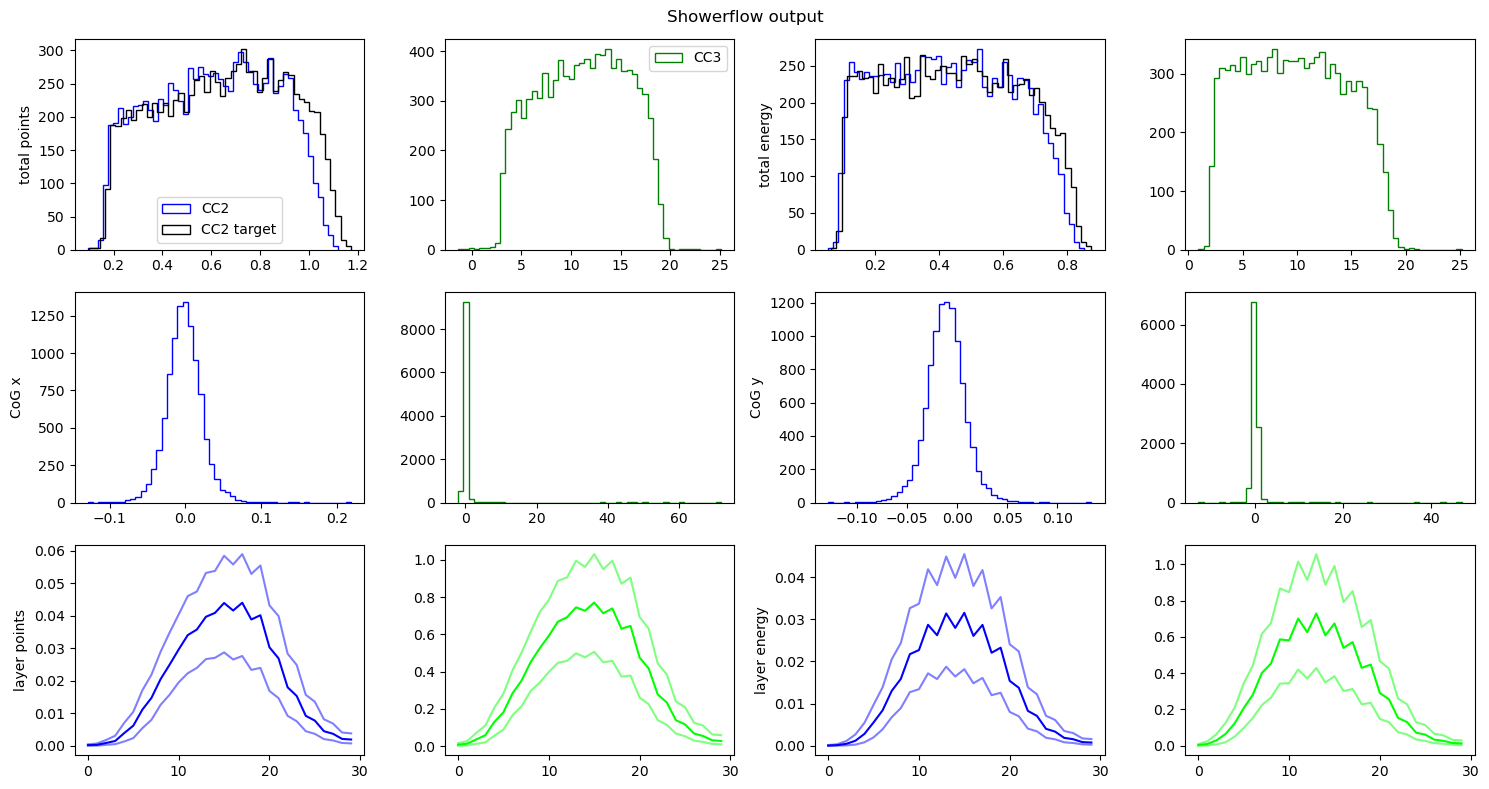

In [24]:

fig, ax_arr = plt.subplots(3, 4, figsize=(15, 8))
ax_arr = ax_arr.flatten()
fig.suptitle("Showerflow output")
hist2_settings = dict(label='CC2', color='blue', histtype="step", bins=np.linspace(-5, 5, 50))
hist3_settings = dict(label='CC3', color='green', histtype="step", bins=np.linspace(-5, 5, 50))
hist2_settings = dict(label='CC2', color='blue', histtype="step", bins= 50)
hist3_settings = dict(label='CC3', color='green', histtype="step", bins=50)

hist2_tar_settings = dict(label='CC2 target', color='k', histtype="step", bins= 50)
hist3_tar_settings = dict(label='CC3 target', color='k', histtype="step", bins=50)


i=4
ax_arr[i].set_ylabel("CoG x")
cc2_v = conditioned_samples["CC2"][1][:, 4]
cc3_v = conditioned_samples["CC3"][1][:, 0]

ax_arr[i].hist(cc2_v, **hist2_settings)
#ax_arr[i].hist(cc2_training_targets[:, 4], **hist2_tar_settings)
ax_arr[i+1].hist(cc3_v, **hist3_settings)

i=6
ax_arr[i].set_ylabel("CoG y")
cc2_v = conditioned_samples["CC2"][1][:, 2]
cc3_v = conditioned_samples["CC3"][1][:, 1]

ax_arr[i].hist(cc2_v, **hist2_settings)
#ax_arr[i].hist(cc2_training_targets[:, 2], **hist2_tar_settings)
ax_arr[i+1].hist(cc3_v, **hist3_settings)

i=0
# total points
hist2_settings['bins'] = 50
hist3_settings['bins'] = 50
ax_arr[i].set_ylabel("total points")
cc2_v = conditioned_samples["CC2"][1][:, 0]
cc3_v = conditioned_samples["CC3"][1][:, -60:-30].sum(dim=1)

ax_arr[i].hist(cc2_v, **hist2_settings)
ax_arr[i].hist(cc2_training_targets[:, 0], **hist2_tar_settings)
ax_arr[i+1].hist(cc3_v, **hist3_settings)

i=8
ax_arr[i].set_ylabel("layer points")
layer_pnts2 = np.zeros((3, 30))
raw = conditioned_samples["CC2"][1][:, -60:-30]
raw_totals = raw.sum(dim=1)
renormed = raw*(cc2_v[:, None]/raw_totals[:, None])
layer_pnts3 = np.zeros((3, 30))
quantiles = [0.25, 0.5, 0.75]
for l in range(30):
    layer_pnts2[:, l] = np.quantile(renormed[:, l], quantiles)
    layer_pnts3[:, l] = np.quantile(conditioned_samples["CC3"][1][:, -60+l], quantiles)
colour = ((0, 0, 1, 0.5), (0, 0, 1, 1), (0, 0, 1, 0.5))
for j in range(3):
    ax_arr[i].plot(range(30), layer_pnts2[j], color=colour[j])
colour = ((0, 1, 0, 0.5), (0, 1, 0, 1), (0, 1, 0, 0.5))
for j in range(3):
    ax_arr[i+1].plot(range(30), layer_pnts3[j], color=colour[j])



i=2
# total energy
ax_arr[i].set_ylabel("total energy")
cc2_v = conditioned_samples["CC2"][1][:, 1]
cc3_v = conditioned_samples["CC3"][1][:, -30:].sum(dim=1)

ax_arr[i].hist(cc2_v, **hist2_settings)
ax_arr[i].hist(cc2_training_targets[:, 1]/2.5, **hist2_tar_settings)
ax_arr[i+1].hist(cc3_v, **hist3_settings)

i=10
ax_arr[i].set_ylabel("layer energy")
layer_e2 = np.zeros((3, 30))
raw = conditioned_samples["CC2"][1][:, -30:]
raw_totals = raw.sum(dim=1)
renormed = raw*(cc2_v[:, None]/raw_totals[:, None])
layer_e3 = np.zeros((3, 30))
quantiles = [0.25, 0.5, 0.75]
for l in range(30):
    layer_e2[:, l] = np.quantile(renormed[:, l], quantiles)
    layer_e3[:, l] = np.quantile(conditioned_samples["CC3"][1][:, -30+l], quantiles)
colour = ((0, 0, 1, 0.5), (0, 0, 1, 1), (0, 0, 1, 0.5))
for j in range(3):
    ax_arr[i].plot(range(30), layer_e2[j], color=colour[j])
colour = ((0, 1, 0, 0.5), (0, 1, 0, 1), (0, 1, 0, 0.5))
for j in range(3):
    ax_arr[i+1].plot(range(30), layer_e3[j], color=colour[j])

plt.tight_layout()
ax_arr[0].legend()
ax_arr[1].legend()

In [36]:
n_pnts = (events[..., -1] > 0).sum(axis=1)
from pointcloud.utils.showerflow_training import get_cog

cog_path, _ = get_cog(cc_2_config, cc2_showerflow_dir)
cog = np.load(cog_path)
all_cond_meta.mean_cog = np.mean(cog, axis=0)
all_cond_meta.std_cog = np.std(cog, axis=0)

raw_cog_x = (events[..., -1]*events[..., 0]/events[..., [-1]].sum(axis=1)).sum(axis=1)
raw_cog_y = (events[..., -1]*events[..., 1]/events[..., [-1]].sum(axis=1)).sum(axis=1)

print(f"{np.mean(raw_cog_x, axis=0)=}, {all_cond_meta.mean_cog[0]}")
print(f"{np.mean(raw_cog_y, axis=0)=}, {all_cond_meta.mean_cog[1]}")

energy = events[..., -1].sum(axis=1)/all_cond_meta.vis_eng_rescale
cog_x = (raw_cog_x-all_cond_meta.mean_cog[0])/all_cond_meta.std_cog[0]
cog_y = (raw_cog_y-all_cond_meta.mean_cog[1])/all_cond_meta.std_cog[1]



Using precaluclated cog
np.mean(raw_cog_x, axis=0)=np.float32(-39.99353), -39.99352682914734
np.mean(raw_cog_y, axis=0)=np.float32(0.37596914), 0.37596914536141735


In [42]:
cc2_sf_mean_xy_cog = np.mean(conditioned_samples['CC2'][1][:, [4, 2]].detach().numpy(), axis=0) 
cc2_sf_std_xy_cog = np.std(conditioned_samples['CC2'][1][:, [4, 2]].detach().numpy(), axis=0) 
print(f"{cc2_sf_mean_xy_cog=}, {cc2_sf_std_xy_cog=}")
clipped_cc3 = np.clip(conditioned_samples['CC3'][1][:, [0, 1]].detach().numpy(), -4, 4)
cc3_sf_mean_xy_cog = np.mean(clipped_cc3, axis=0) 
cc3_sf_std_xy_cog = np.std(clipped_cc3, axis=0) 
print(f"{cc3_sf_mean_xy_cog=}, {cc3_sf_std_xy_cog=}")
cc_2_meta.mean_cog[[2, 0]] = cc2_sf_mean_xy_cog
cc_2_meta.std_cog[[2, 0]] = cc2_sf_std_xy_cog
cc_3_meta.mean_cog[[0, 1]] = cc3_sf_mean_xy_cog
cc_3_meta.std_cog[[0, 1]] = cc3_sf_std_xy_cog

cc2_sf_mean_xy_cog=array([-0.00203015, -0.01151467], dtype=float32), cc2_sf_std_xy_cog=array([0.02313847, 0.019023  ], dtype=float32)
cc3_sf_mean_xy_cog=array([0.01017182, 0.02574854], dtype=float32), cc3_sf_std_xy_cog=array([0.4572766, 0.6338336], dtype=float32)


tensor(1.0001) tensor(3.4620) 1.0000000344220443
torch.Size([10000]) torch.Size([10000]) (10000,)


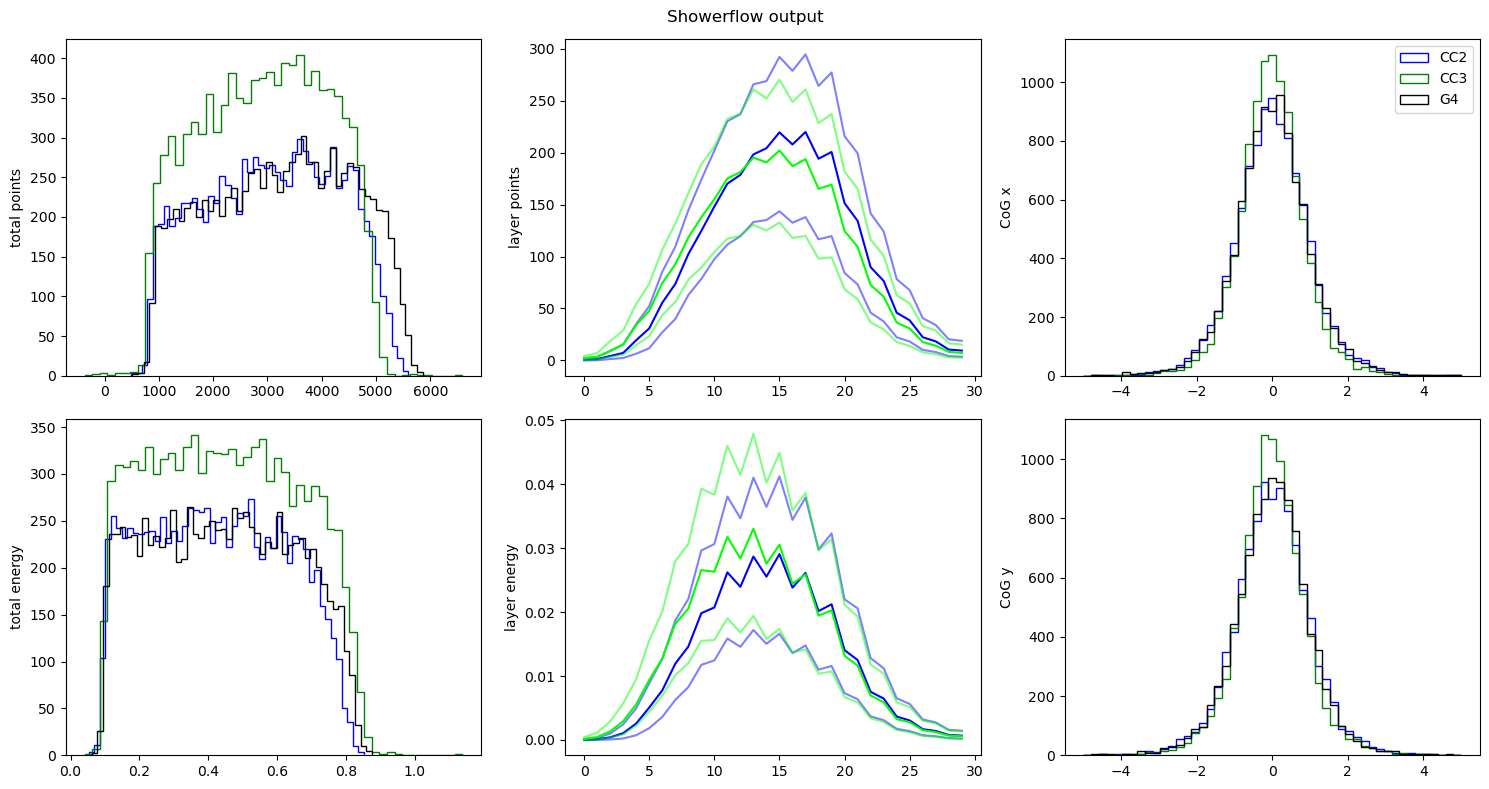

In [43]:
from matplotlib import pyplot as plt
fig, ax_arr = plt.subplots(2, 3, figsize=(15, 8))
ax_arr = ax_arr.flatten()
fig.suptitle("Showerflow output")
hist2_settings = dict(label='CC2', color='blue', histtype="step", bins=np.linspace(-5, 5, 50))
hist3_settings = dict(label='CC3', color='green', histtype="step", bins=np.linspace(-5, 5, 50))
histg4_settings = dict(label='G4', color='k', histtype='step', bins=np.linspace(-5, 5, 50))
#hist2_settings = dict(label='CC2', color='blue', histtype="step", bins=50)
#hist3_settings = dict(label='CC3', color='green', histtype="step", bins=50)
#histg4_settings = dict(label='G4', color='k', histtype='step', bins=50)

i=2
ax_arr[i].set_ylabel("CoG x")
cc2_v = (conditioned_samples["CC2"][1][:, 4]-cc_2_meta.mean_cog[2])/cc_2_meta.std_cog[2]
cc3_v = (conditioned_samples["CC3"][1][:, 0]-cc_3_meta.mean_cog[0])/cc_3_meta.std_cog[0]
#cc3_v = (conditioned_samples["CC3"][1][:, 0]-0)/1

print(cc2_v.std(), cc3_v.std(), cog_x.std())
print(cc2_v.shape, cc3_v.shape, cog_x.shape)

ax_arr[i].hist(cc2_v, **hist2_settings)
ax_arr[i].hist(cc3_v, **hist3_settings)
ax_arr[i].hist(cog_x, **histg4_settings)
ax_arr[i].legend()

i=5
ax_arr[i].set_ylabel("CoG y")
cc2_v = conditioned_samples["CC2"][1][:, 2]*cc_2_meta.std_cog[0]
cc3_v = conditioned_samples["CC3"][1][:, 1]*cc_3_meta.std_cog[1]
cc2_v = (conditioned_samples["CC2"][1][:, 2]-cc_2_meta.mean_cog[0])/cc_2_meta.std_cog[0]
cc3_v = (conditioned_samples["CC3"][1][:, 1]-cc_3_meta.mean_cog[1])/cc_3_meta.std_cog[1]

ax_arr[i].hist(cc2_v, **hist2_settings)
ax_arr[i].hist(cc3_v, **hist3_settings)
ax_arr[i].hist(cog_y, **histg4_settings)

i=0
# total points
hist2_settings['bins'] = 50
hist3_settings['bins'] = 50
histg4_settings['bins'] = 50
ax_arr[i].set_ylabel("total points")
cc2_v = (float(all_cond_meta.n_pts_rescale)*conditioned_samples["CC2"][1][:, 0]).clip(1, 60_000)
cc3_v = float(cc_3_meta.n_pts_rescale/30)*conditioned_samples["CC3"][1][:, -60:-30].sum(dim=1)

ax_arr[i].hist(cc2_v, **hist2_settings)
ax_arr[i].hist(cc3_v, **hist3_settings)
ax_arr[i].hist(n_pnts, **histg4_settings)

i=1
ax_arr[i].set_ylabel("layer points")
layer_pnts2 = np.zeros((3, 30))
raw = conditioned_samples["CC2"][1][:, -60:-30].clip(0, 1)
raw_totals = raw.sum(dim=1)
renormed = raw*(cc2_v[:, None]/raw_totals[:, None])
layer_pnts3 = np.zeros((3, 30))
quantiles = [0.25, 0.5, 0.75]
for l in range(30):
    layer_pnts2[:, l] = np.quantile(renormed[:, l], quantiles)
    layer_pnts3[:, l] = float(cc_3_meta.n_pts_rescale)*np.quantile(conditioned_samples["CC3"][1][:, -60+l], quantiles)/30
colour = ((0, 0, 1, 0.5), (0, 0, 1, 1), (0, 0, 1, 0.5))
for j in range(3):
    ax_arr[i].plot(range(30), layer_pnts2[j], color=colour[j])
colour = ((0, 1, 0, 0.5), (0, 1, 0, 1), (0, 1, 0, 0.5))
for j in range(3):
    ax_arr[i].plot(range(30), layer_pnts3[j], color=colour[j])



i=3
# total energy
ax_arr[i].set_ylabel("total energy")
cc2_v = conditioned_samples["CC2"][1][:, 1]
cc3_v = cc_3_meta.vis_eng_rescale*conditioned_samples["CC3"][1][:, -30:].sum(dim=1)/30

ax_arr[i].hist(cc2_v, **hist2_settings)
ax_arr[i].hist(cc3_v, **hist3_settings)
ax_arr[i].hist(energy, **histg4_settings)

i=4
ax_arr[i].set_ylabel("layer energy")
layer_e2 = np.zeros((3, 30))
raw = conditioned_samples["CC2"][1][:, -30:].clip(0, 1)
renormed = raw*(cc2_v[:, None]/raw_totals[:, None])
layer_e3 = np.zeros((3, 30))
quantiles = [0.25, 0.5, 0.75]
for l in range(30):
    layer_e2[:, l] = np.quantile(renormed[:, l], quantiles)
    layer_e3[:, l] = np.quantile(cc_3_meta.vis_eng_rescale*conditioned_samples["CC3"][1][:, -30+l], quantiles)/30
colour = ((0, 0, 1, 0.5), (0, 0, 1, 1), (0, 0, 1, 0.5))
for j in range(3):
    ax_arr[i].plot(range(30), layer_e2[j], color=colour[j])
colour = ((0, 1, 0, 0.5), (0, 1, 0, 1), (0, 1, 0, 0.5))
for j in range(3):
    ax_arr[i].plot(range(30), layer_e3[j], color=colour[j])

plt.tight_layout()

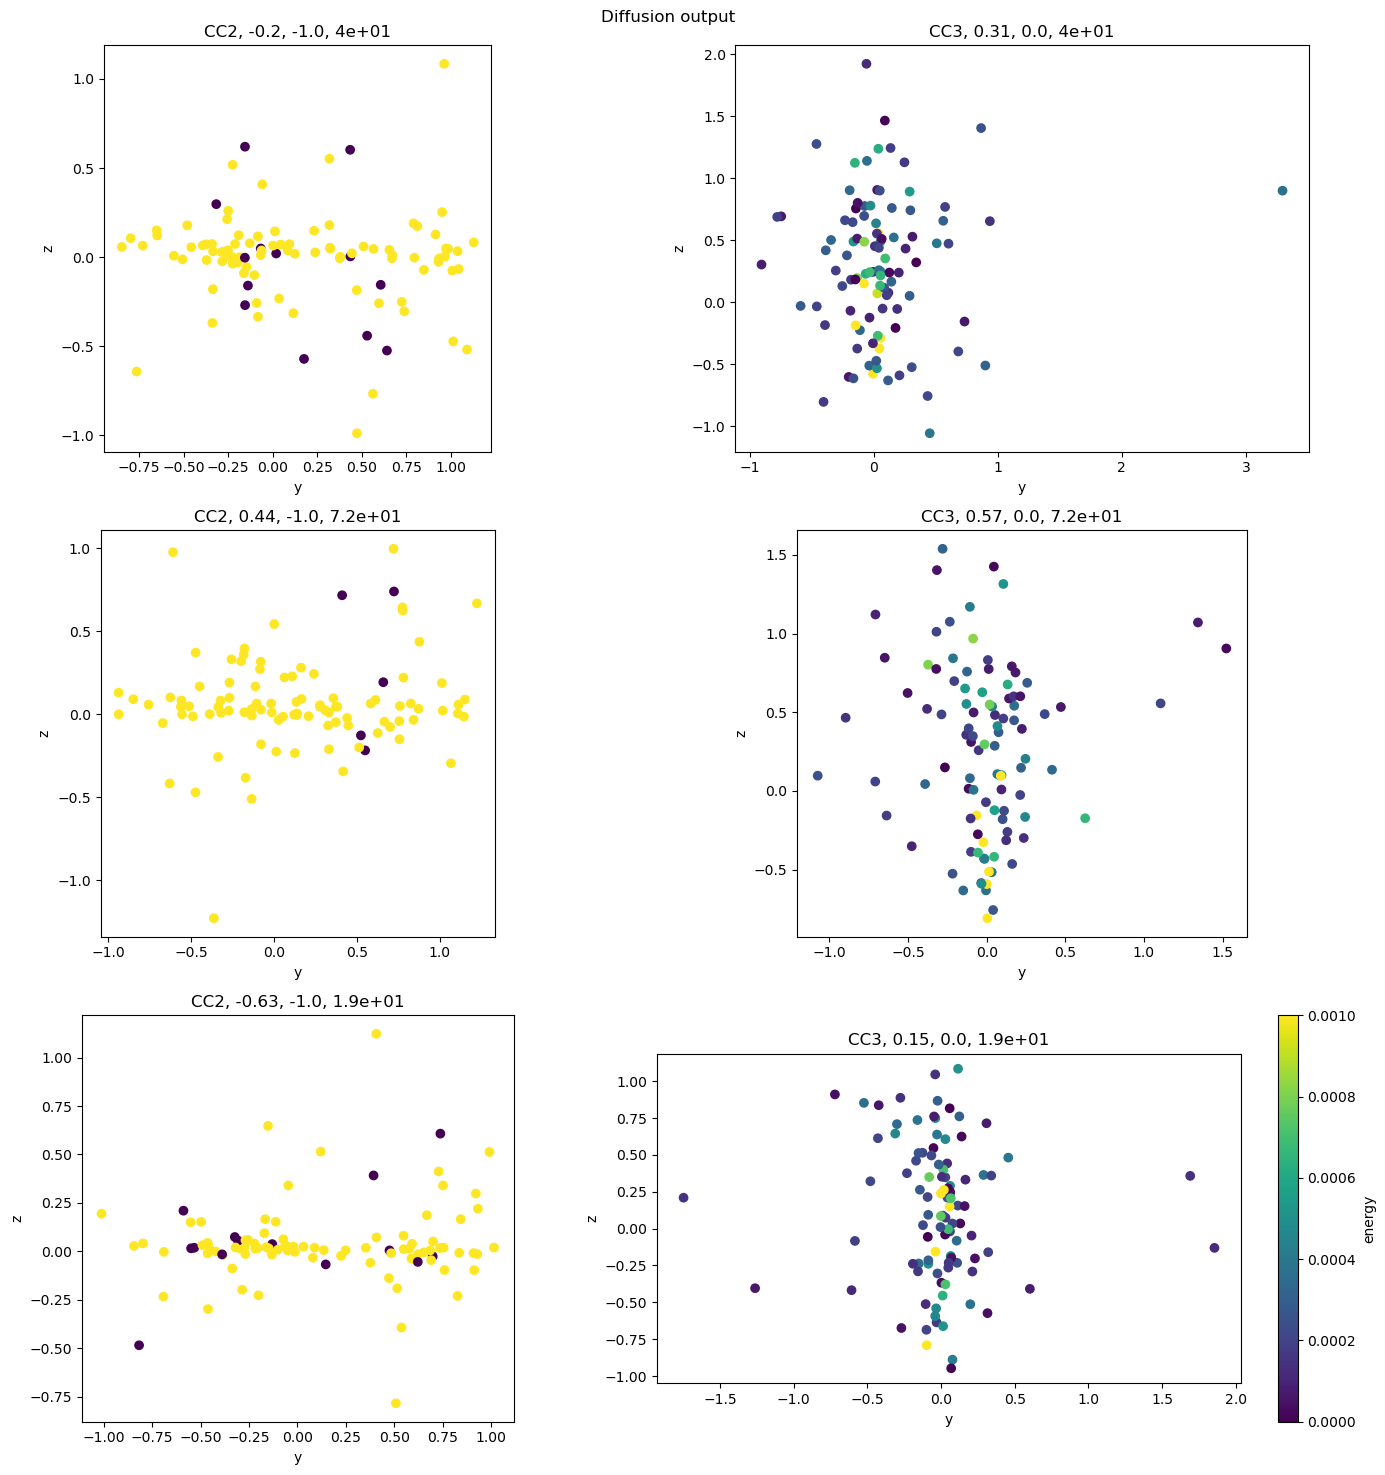

In [44]:
from matplotlib import pyplot as plt
min_energy = min(conditioned_samples["CC2"][0][..., -1].min(),
                 conditioned_samples["CC3"][0][..., -1].min())
max_energy = max(conditioned_samples["CC2"][0][..., -1].max(),
                 conditioned_samples["CC3"][0][..., -1].max())
min_energy = 0
max_energy = 0.001
use_events = [0, 51, 99]

Emean, Estd = -1.5300317, 1.2500798
fig, ax_arr = plt.subplots(len(use_events), 2, figsize=(15, len(use_events)*5))
fig.suptitle("Diffusion output")
for e, event in enumerate(use_events):
    for i, name in enumerate(conditioned_samples):
        s_diffusion, s_showerflow = conditioned_samples[name]
        s_diffusion = s_diffusion.detach()
        ax_arr[e, i].set_aspect(1)
        if "3" in name:
            energy_here = ((s_diffusion[event, :, 3]*Estd*2) + Emean).exp()
        else:
            energy_here = s_diffusion[event, :, 3]
        points = ax_arr[e, i].scatter(s_diffusion[event, :, 1], s_diffusion[event, :, 2], c=energy_here, vmin=min_energy, vmax=max_energy)
        ax_arr[e, i].set_title(f"{name}, {diffusion_cond[name][event, 0]:.2}, {diffusion_cond[name][event, 1]:.2}, {cond[event, 0]:.2}")
        ax_arr[e, i].set_xlabel("y")
        ax_arr[e, i].set_ylabel("z")
cbar = plt.colorbar(points)
cbar.set_label("energy")
plt.tight_layout()

In [45]:
from pointcloud.utils.showerflow_utils import truescale_showerflow_output
model_name = "CC2"
diffusion_m, sf_m, config_m = cc_models[model_name]

import ipdb
if True:
    all_cond_meta = Metadata(all_cond_config)
    if "3" in model_name:
        config_m.metadata = cc_3_meta
    else:
        config_m.metadata = cc_2_meta
    #ipdb.set_trace()
    np_ts, energy_ts, cog_x_ts, cog_y_ts, cog_z_ts, clusters_per_layer_ts, e_per_layer_ts = truescale_showerflow_output(conditioned_samples[model_name][1].clone(), config_m)
    if np_ts is None:
        np_ts = clusters_per_layer_ts.sum(dim=1)
    if energy_ts is None:
        energy_ts = e_per_layer_ts.sum(dim=1)
    if "2" in model_name:
        cog_x_ts, cog_y_ts, cog_z_ts = cog_z_ts, cog_x_ts, cog_y_ts
print(np_ts.mean(), cog_x_ts.mean(), cog_y_ts.mean(), clusters_per_layer_ts.mean(), e_per_layer_ts.mean())

tensor(3055.5517, dtype=torch.float64) tensor(-0.0021) tensor(-0.0117) tensor(0.4002) tensor(0.3668)


In [46]:
from pointcloud.utils.gen_utils import gen_cond_showers_batch
# CC2
max_cond = 10_000
cond_m = {"showerflow":cond[:max_cond, [0]], "diffusion": cond[:max_cond, [0, 1]]}
diffusion_m, sf_m, config_m = cc_models["CC2"]
all_cond_config.device='cpu'
all_cond_config.distillation = True
import ipdb
if True:
    import ipdb
    #ipdb.set_trace()
    cc2_events = gen_cond_showers_batch(diffusion_m, sf_m, cond_m, config=config_m)

In [47]:
total_points_2s = (cc2_events[:, :, 3] > 0).sum(axis=1)
total_energy_2s = cc2_events[:, :, 3].sum(axis=1)/1000
#cog_x_2s = ((cc2_events[..., -1]*cc2_events[..., 0]/cc2_events[..., [-1]].sum(axis=1)).sum(axis=1)-all_cond_meta.mean_cog[0])/all_cond_meta.std_cog[0]
#cog_y_2s = ((cc2_events[..., -1]*cc2_events[..., 1]/cc2_events[..., [-1]].sum(axis=1)).sum(axis=1)-all_cond_meta.mean_cog[1])/all_cond_meta.std_cog[1]
cog_x_2s = (cc2_events[..., -1]*cc2_events[..., 0]/cc2_events[..., [-1]].sum(axis=1)).sum(axis=1)
cog_y_2s = (cc2_events[..., -1]*cc2_events[..., 1]/cc2_events[..., [-1]].sum(axis=1)).sum(axis=1)

In [48]:
from pointcloud.utils.gen_utils import gen_cond_showers_batch
# CC3
max_cond = 10_000
cond_m = {"showerflow":cond[:max_cond, [0, 2, 3, 4]], "diffusion": cond[:max_cond, [0, 2, 3, 4]]}
diffusion_m, sf_m, config_m = cc_models["CC3"]
config_m.device='cpu'
config_m.metadata = cc_3_meta
#cc_3_meta.std_cog = cc_3_meta.std_cog[[2,0,1]]
if True:
    #ipdb.set_trace()
    cc3_events = gen_cond_showers_batch(diffusion_m, sf_m, cond_m, config=config_m)



In [49]:
dataset_stats = np.load("/data/dust/user/dayhallh/data/ILCsoftEvents/p22_th90_ph90_en10-100_joined/stats.npz")
for key in dataset_stats.keys():
    print(key, dataset_stats[key])

path /data/dust/user/dayhallh/data/ILCsoftEvents/p22_th90_ph90_en10-100_joined/p22_th90_ph90_en10-100_seed{}_all_steps.hdf5
mean_point [ 1.22085438e-04  5.46113000e-01 -1.43398707e-02  3.42128658e-04]
std_point [5.01166184e-03 1.03514488e+00 2.80895001e-02 6.88304610e-04]
mean_event [ 3.82163269e-01  1.70949404e+03 -4.48880056e+01  1.07096315e+00]
std_event [5.18406994e-01 8.18390107e+02 2.19667064e+01 8.19594157e-01]
mean_n_points 3130.29362
std_n_points 1231.3112889384615
mean_cog [ 3.8028497e-01  1.8952594e+03 -4.9972588e+01]
std_cog [ 0.5199222  12.771177    0.48483732]


In [50]:
total_points_3s = (cc3_events[:, :, 3] > 0).sum(axis=1)
total_energy_3s = cc3_events[:, :, 3].sum(axis=1)/1000
cog_x_3s_raw = (cc3_events[..., -1]*cc3_events[..., 0]/cc3_events[..., [-1]].sum(axis=1)).sum(axis=1)
cog_x_3s = (cog_x_3s_raw-dataset_stats["mean_event"][0])/dataset_stats["std_event"][0]
cog_y_3s_raw = (cc3_events[..., -1]*cc3_events[..., 1]/events[..., [-1]].sum(axis=1)).sum(axis=1)
cog_y_3s = (cog_y_3s_raw-dataset_stats["mean_event"][1])/dataset_stats["std_event"][1]
print(cog_x_3s_raw.mean(), cog_x_3s_raw.std(), cog_y_3s_raw.mean(), cog_y_3s_raw.std())
print(cog_x_3s.mean(), cog_x_3s.std(), cog_y_3s.mean(), cog_y_3s.std())

10.352721512377881 4.1912755236003 402.7521228141401 3942.4991604454526
19.23307047718482 8.084913158056214 -1.5967225247023074 4.81738370087644


In [51]:
total_points_3s = (cc3_events[:, :, 3] > 0).sum(axis=1)
total_energy_3s = cc3_events[:, :, 3].sum(axis=1)/1000
cog_x_3s = (cc3_events[..., -1]*cc3_events[..., 0]/cc3_events[..., [-1]].sum(axis=1)).sum(axis=1)
#cog_x_3s = ((cc3_events[..., -1]*cc3_events[..., 0]/cc3_events[..., [-1]].sum(axis=1)).sum(axis=1)-dataset_stats["mean_event"][0])/dataset_stats["std_event"][0]
cog_y_3s = (cc3_events[..., -1]*cc3_events[..., 1]/cc3_events[..., [-1]].sum(axis=1)).sum(axis=1)
cog_z_3s = (cc3_events[..., -1]*cc3_events[..., 2]/cc3_events[..., [-1]].sum(axis=1)).sum(axis=1)

#cog_y_3s = ((cc3_events[..., -1]*cc3_events[..., 1]/cc3_events[..., [-1]].sum(axis=1)).sum(axis=1)-dataset_stats["mean_event"][1])/dataset_stats["std_event"][1]
print(cog_x_3s.mean(), cog_x_3s.std(), cog_y_3s.mean(), cog_y_3s.std(), cog_z_3s.mean(), cog_z_3s.std())

10.352721512377881 4.1912755236003 0.2844186788576374 7.135293520588789 1846.178016921227 6.8838592331874775


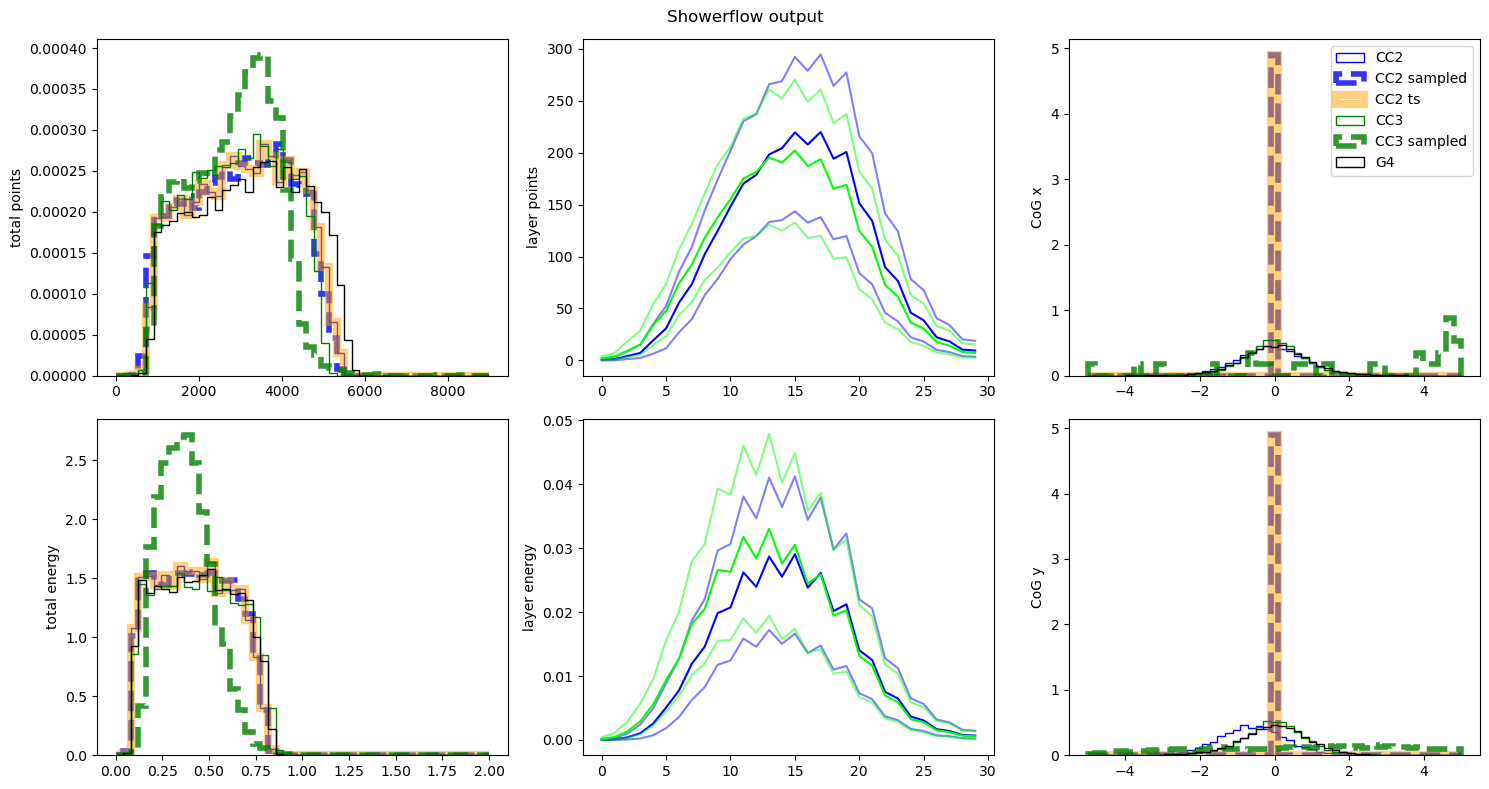

In [56]:
from matplotlib import pyplot as plt
fig, ax_arr = plt.subplots(2, 3, figsize=(15, 8))
ax_arr = ax_arr.flatten()
fig.suptitle("Showerflow output")
hist_common = dict(histtype='step', bins=np.linspace(-5, 5, 50), density=True)
hist2_settings = dict(label='CC2', color='blue')
hist2s_settings = dict(label='CC2 sampled', color='blue', linewidth=4, alpha=0.8, linestyle='--')
hist2ts_settings = dict(label=f'{model_name} ts', color='orange', linewidth=6, alpha=0.5)
hist3_settings = dict(label='CC3', color='green')
hist3s_settings = dict(label='CC3 sampled', color='green', linewidth=4, alpha=0.8, linestyle='--')
histg4_settings = dict(label='G4', color='k')
settings = [hist2_settings, hist2s_settings, hist2ts_settings, hist3_settings, hist3s_settings, histg4_settings]
for seti in settings:
    seti.update(hist_common)

i=2
ax_arr[i].set_ylabel("CoG x")
cc2_v = conditioned_samples["CC2"][1][:, 4]/cc_2_meta.std_cog[2]
cc3_v = conditioned_samples["CC3"][1][:, 0]/cc_3_meta.std_cog[0]

ax_arr[i].hist(cc2_v, **hist2_settings)
ax_arr[i].hist(cog_x_2s, **hist2s_settings)
ax_arr[i].hist(cog_x_ts, **hist2ts_settings)
ax_arr[i].hist(cc3_v, **hist3_settings)
ax_arr[i].hist(cog_x_3s, **hist3s_settings)
ax_arr[i].hist(cog_x, **histg4_settings)
ax_arr[i].legend()

i=5
ax_arr[i].set_ylabel("CoG y")
cc2_v = conditioned_samples["CC2"][1][:, 2]/cc_2_meta.std_cog[0]
cc3_v = conditioned_samples["CC3"][1][:, 1]/cc_3_meta.std_cog[1]

ax_arr[i].hist(cc2_v, **hist2_settings)
ax_arr[i].hist(cog_y_2s, **hist2s_settings)
ax_arr[i].hist(cog_y_ts, **hist2ts_settings)
ax_arr[i].hist(cc3_v, **hist3_settings)
ax_arr[i].hist(cog_y_3s, **hist3s_settings)
ax_arr[i].hist(cog_y, **histg4_settings)

i=0
# total points
for seti in settings:
    seti['bins'] = np.linspace(0, 9000, 50)
    
ax_arr[i].set_ylabel("total points")
cc2_v = (float(all_cond_meta.n_pts_rescale)*conditioned_samples["CC2"][1][:, 0]).clip(1, 60_000)
cc3_v = float(cc_3_meta.n_pts_rescale)*conditioned_samples["CC3"][1][:, -60:-30].sum(dim=1)/30

ax_arr[i].hist(cc2_v, **hist2_settings)
ax_arr[i].hist(total_points_2s, **hist2s_settings)
ax_arr[i].hist(np_ts, **hist2ts_settings)
ax_arr[i].hist(cc3_v, **hist3_settings)
ax_arr[i].hist(total_points_3s, **hist3s_settings)
ax_arr[i].hist(n_pnts, **histg4_settings)

i=1
ax_arr[i].set_ylabel("layer points") 
layer_pnts2 = np.zeros((3, 30))
raw = conditioned_samples["CC2"][1][:, -60:-30].clip(0, 1)
raw_totals = raw.sum(dim=1)
renormed = raw*(cc2_v[:, None]/raw_totals[:, None])
layer_pnts3 = np.zeros((3, 30))
quantiles = [0.25, 0.5, 0.75]
for l in range(30):
    layer_pnts2[:, l] = np.quantile(renormed[:, l], quantiles)
    layer_pnts3[:, l] = float(cc_3_meta.n_pts_rescale)*np.quantile(conditioned_samples["CC3"][1][:, -60+l], quantiles)/30
colour = ((0, 0, 1, 0.5), (0, 0, 1, 1), (0, 0, 1, 0.5))
for j in range(3):
    ax_arr[i].plot(range(30), layer_pnts2[j], color=colour[j])
colour = ((0, 1, 0, 0.5), (0, 1, 0, 1), (0, 1, 0, 0.5))
for j in range(3):
    ax_arr[i].plot(range(30), layer_pnts3[j], color=colour[j])



i=3
# total energy
for seti in settings:
    seti['bins'] = np.linspace(0, 2, 50)
    
ax_arr[i].set_ylabel("total energy")
cc2_v = conditioned_samples["CC2"][1][:, 1]
cc3_v = cc_3_meta.vis_eng_rescale*conditioned_samples["CC3"][1][:, -30:].sum(dim=1)/30

ax_arr[i].hist(cc2_v, **hist2_settings)
ax_arr[i].hist(total_energy_2s, **hist2s_settings)
ax_arr[i].hist(energy_ts/1000, **hist2ts_settings)
ax_arr[i].hist(cc3_v, **hist3_settings)
ax_arr[i].hist(total_energy_3s, **hist3s_settings)
ax_arr[i].hist(energy, **histg4_settings)

i=4
ax_arr[i].set_ylabel("layer energy")
layer_e2 = np.zeros((3, 30))
raw = conditioned_samples["CC2"][1][:, -30:].clip(0, 1)
renormed = raw*(cc2_v[:, None]/raw_totals[:, None])
layer_e3 = np.zeros((3, 30))
quantiles = [0.25, 0.5, 0.75]
for l in range(30):
    layer_e2[:, l] = np.quantile(renormed[:, l], quantiles)
    layer_e3[:, l] = np.quantile(cc_3_meta.vis_eng_rescale*conditioned_samples["CC3"][1][:, -30+l], quantiles)/30
colour = ((0, 0, 1, 0.5), (0, 0, 1, 1), (0, 0, 1, 0.5))
for j in range(3):
    ax_arr[i].plot(range(30), layer_e2[j], color=colour[j])
colour = ((0, 1, 0, 0.5), (0, 1, 0, 1), (0, 1, 0, 0.5))
for j in range(3):
    ax_arr[i].plot(range(30), layer_e3[j], color=colour[j])

plt.tight_layout()

In [53]:
for line_3, line_2 in zip(repr(cc_3_meta).split('\n'), repr(cc_2_meta).split('\n')):
    print(line_3 + '\t' + line_2)
    

Metadata for /data/dust/user/dayhallh/data/ILCsoftEvents/highGran_g40_p22_th90_ph90_en10-100.hdf5	Metadata for /data/dust/user/dayhallh/data/ILCsoftEvents/highGran_g40_p22_th90_ph90_en10-100.hdf5
layer_bottom_pos_hdf5: [1811.34020996 1814.46508789 1823.81005859 1826.93505859 1836.2800293	layer_bottom_pos_hdf5: [1811.34020996 1814.46508789 1823.81005859 1826.93505859 1836.2800293
 1839.4050293  1848.75       1851.875      1861.2199707  1864.3449707	 1839.4050293  1848.75       1851.875      1861.2199707  1864.3449707
 1873.68994141 1876.81494141 1886.16003418 1889.28503418 1898.63000488	 1873.68994141 1876.81494141 1886.16003418 1889.28503418 1898.63000488
 1901.75500488 1911.09997559 1914.22497559 1923.56994629 1926.69494629	 1901.75500488 1911.09997559 1914.22497559 1923.56994629 1926.69494629
 1938.14001465 1943.36499023 1954.81005859 1960.03503418 1971.47998047	 1938.14001465 1943.36499023 1954.81005859 1960.03503418 1971.47998047
 1976.70495605 1988.15002441 1993.375      2004.8199

In [54]:
conditioned_raws = {"CC2": {"total_pnts": conditioned_samples["CC2"][1][:, 0],
                            "total_energy": conditioned_samples["CC2"][1][:, 1],
                            "cog_x": conditioned_samples["CC2"][1][:, 2],
                            "cog_y": conditioned_samples["CC2"][1][:, 3],
                            "cog_z": conditioned_samples["CC2"][1][:, 4]},
                    "CC3": {"total_pnts": conditioned_samples["CC3"][1][:, -60:-30].sum(dim=1),
                            "total_energy": conditioned_samples["CC3"][1][:, -30:].sum(dim=1),
                            "cog_x": conditioned_samples["CC3"][1][:, 0],
                            "cog_y": conditioned_samples["CC3"][1][:, 1]}}
                            
                            

In [55]:
print("STD CC2")
cc2_conditioned_stds = {key + "_std":conditioned_raws["CC2"][key].std() for key in conditioned_raws["CC2"]}
print(cc2_conditioned_stds)
print("STD CC3")
cc3_conditioned_stds = {key + "_std":conditioned_raws["CC3"][key].std() for key in conditioned_raws["CC3"]}
print(cc3_conditioned_stds)
print("Mean CC2")
cc2_conditioned_means = {key + "_mean":conditioned_raws["CC2"][key].mean() for key in conditioned_raws["CC2"]}
print(cc2_conditioned_means)
print("Mean CC3")
cc3_conditioned_means = {key + "_mean":conditioned_raws["CC3"][key].mean() for key in conditioned_raws["CC3"]}
print(cc3_conditioned_means)
#np.savez(cc2_showerflow_path.replace(".pth", "_stats_cond_p22_th90_ph90_en10-100.npz"), **cc2_conditioned_stds, **cc2_conditioned_means)
#np.savez(cc3_showerflow_path.replace(".pth", "_stats_cond_p22_th90_ph90_en10-100.npz"), **cc3_conditioned_stds, **cc3_conditioned_means)

STD CC2
{'total_pnts_std': tensor(0.2409), 'total_energy_std': tensor(0.1944), 'cog_x_std': tensor(0.0190), 'cog_y_std': tensor(0.1268), 'cog_z_std': tensor(0.0231)}
STD CC3
{'total_pnts_std': tensor(4.3610), 'total_energy_std': tensor(4.5337), 'cog_x_std': tensor(1.5831), 'cog_y_std': tensor(1.1984)}
Mean CC2
{'total_pnts_mean': tensor(0.6111), 'total_energy_mean': tensor(0.4259), 'cog_x_mean': tensor(-0.0115), 'cog_y_mean': tensor(-0.0181), 'cog_z_mean': tensor(-0.0020)}
Mean CC3
{'total_pnts_mean': tensor(11.1447), 'total_energy_mean': tensor(9.9085), 'cog_x_mean': tensor(0.0554), 'cog_y_mean': tensor(0.0584)}
